In [1]:
#importing libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
#Load the datasets

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [5]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


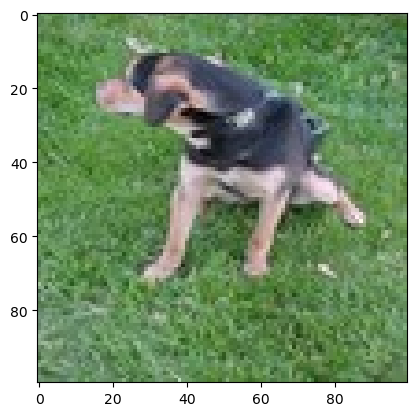

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
#creation of the model

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 3s 85ms/step - loss: 0.7272 - accuracy: 0.5265
Epoch 2/5
32/32 [==============================] - 3s 97ms/step - loss: 0.6751 - accuracy: 0.6115
Epoch 3/5
32/32 [==============================] - 3s 89ms/step - loss: 0.6254 - accuracy: 0.6670
Epoch 4/5
32/32 [==============================] - 3s 87ms/step - loss: 0.5927 - accuracy: 0.6880
Epoch 5/5
32/32 [==============================] - 3s 86ms/step - loss: 0.5365 - accuracy: 0.7420


In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 15ms/step - loss: 0.6089 - accuracy: 0.6825


[0.6088904142379761, 0.6825000047683716]

In [15]:
#making predictions

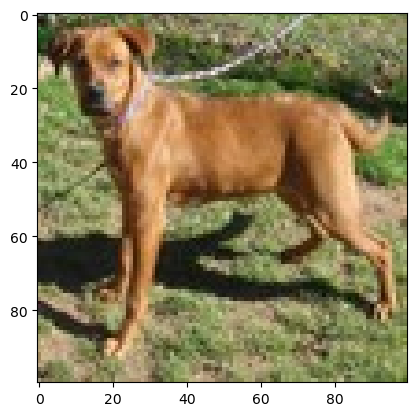

1/1 [==============================] - 0s 74ms/step
[[0.40007585]]
Our model says it is a : dog


In [16]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5


if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)